In [1]:
import array
import numpy as np
import pandas as pd
import random
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('xqf131.tsp', sep=' ', skiprows=8, names=['node', 'x', 'y'])
df.head()

,node,x,y
0,1,0,13
1,2,0,26
2,3,0,27
3,4,0,39
4,5,2,0


In [3]:
tour_size = df.shape[0]
tour_size

131

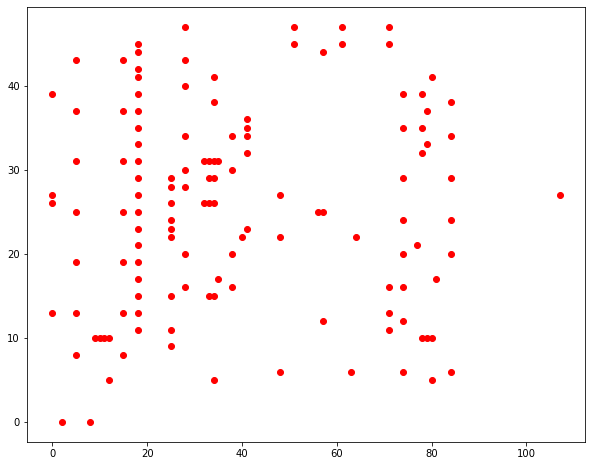

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(df['x'], df['y'], color='red')

In [5]:
distance_map = np.zeros((tour_size, tour_size))
for i in range(tour_size):
    for j in range(tour_size):
        distance_map[i][j] = np.sqrt((df['x'][i] - df['x'][j])**2 + (df['y'][i] - df['y'][j])**2)

In [6]:
random.seed(0)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# Attribute generator
toolbox.register("indices", random.sample, range(tour_size), tour_size)

# Structure initializers
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalTSP(individual):
    distance = distance_map[individual[-1]][individual[0]]
    for gene1, gene2 in zip(individual[0:-1], individual[1:]):
        distance += distance_map[gene1][gene2]
    return distance,

toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selBest)
toolbox.register("evaluate", evalTSP)

In [7]:
pop = toolbox.population(n=200)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

p = algorithms.eaMuPlusLambda(pop, toolbox, 200, 10000, ngen=1000, stats=stats, halloffame=hof, mutpb=0.7, cxpb=0.3)

gen	nevals	avg    	std   	min    	max    
0  	200   	4652.71	193.37	3930.65	5136.94
1  	10000 	4143.17	98.9483	3852.42	4249.16
2  	10000 	3875.77	41.3462	3722.41	3920.97
3  	10000 	3708.48	45.5353	3526.03	3754.24
4  	10000 	3549.9 	40.7486	3413.38	3593.76
5  	10000 	3423.55	37.4568	3274.44	3465.57
6  	10000 	3307.58	35.3505	3179.63	3346.99
7  	10000 	3199.93	38.8037	2965.92	3237.87
8  	10000 	3092.8 	41.9002	2925.42	3137.18
9  	10000 	2993.94	35.8956	2876.2 	3037.07
10 	10000 	2906.08	35.2024	2721.85	2943.83
11 	10000 	2821.88	39.0136	2624.31	2859.97
12 	10000 	2743.4 	38.3228	2561.72	2780.2 
13 	10000 	2659.66	43.3545	2476.57	2705.85
14 	10000 	2557.61	41.688 	2359.76	2600.25
15 	10000 	2470.71	29.2531	2349.19	2502.34
16 	10000 	2411.51	28.3356	2270.3 	2443.12
17 	10000 	2358.9 	25.0938	2255.94	2385.14
18 	10000 	2306.88	23.4652	2209.07	2335.65
19 	10000 	2255.71	24.3054	2178.65	2280.7 
20 	10000 	2208.33	19.6902	2122.46	2230.04
21 	10000 	2163.96	20.8592	2053.66	2187.21
22 	10000 	21

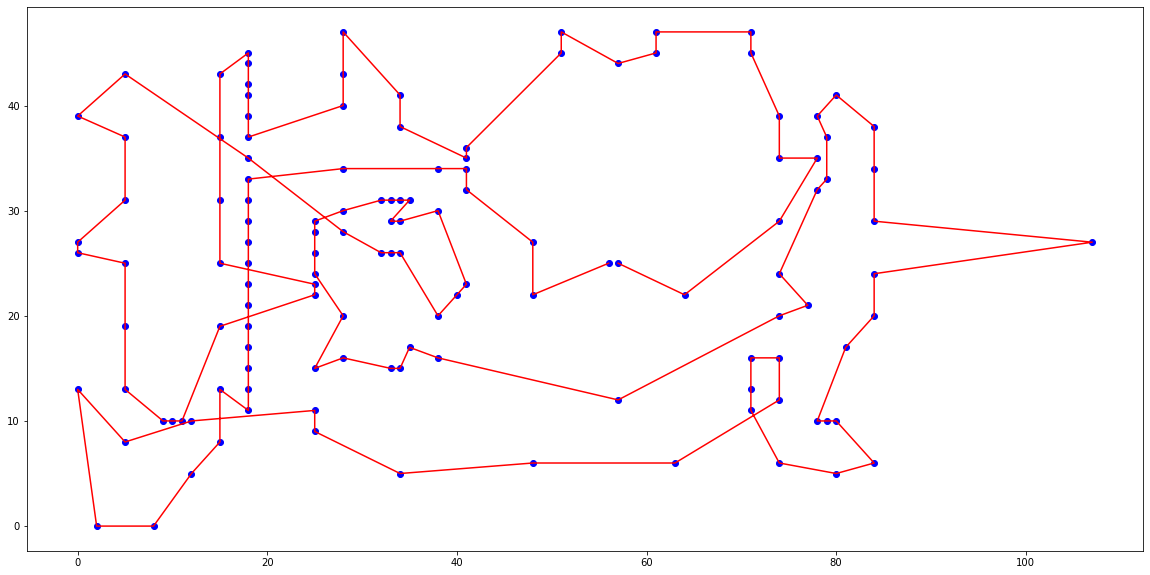

In [8]:
plt.figure(figsize=(20,10))
plt.scatter(df['x'], df['y'], color='blue')
p1_x, p1_y = np.zeros(tour_size), np.zeros(tour_size)
for i in range(tour_size):
    node1 = hof.items[0][i]
    p1_x[i]=(df.loc[node1,'x'])
    p1_y[i]=(df.loc[node1,'y'])
    
plt.plot(p1_x, p1_y, color="red")